In [3]:
import ultralytics
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
import onnx
from onnx_tf.backend import prepare
import cv2
import random
import pybboxes as pbx
ultralytics.checks()

Ultralytics YOLOv8.0.109  Python-3.11.3 torch-2.0.1+cpu CPU
Setup complete  (8 CPUs, 7.8 GB RAM, 337.3/475.7 GB disk)


In [3]:
model = ultralytics.YOLO('yolov8n.pt')
model.train(data = 'data.yaml', epochs = 200)

Ultralytics YOLOv8.0.109  Python-3.10.8 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=False, lr0=0.01, lrf

In [4]:
metrics = model.val()
metrics.box.map

Ultralytics YOLOv8.0.109  Python-3.10.8 torch-2.0.1+cpu CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients
val: Scanning F:\Code\Defect_Detection\valid\labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.61s/it]
                   all         31         41      0.634      0.486      0.494      0.242
                  Hole         31         19       0.55      0.368      0.364      0.117
                  Knot         31         11       0.62      0.636      0.592      0.304
                 Stain         31         11      0.732      0.455      0.526      0.306
Speed: 3.4ms preprocess, 149.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val5


0.24224973551050108

In [5]:
import os
import numpy as np
from PIL import Image

# Directory path
directory = 'test/images'

# List to store the image arrays
image_arrays = []

# Iterate through all files in the directory
for filename in os.listdir(directory):
    # Check if the file is an image (you can modify the condition as needed)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Full path to the image file
        filepath = os.path.join(directory, filename)

        # Open the image file using PIL
        image = Image.open(filepath)

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Append the image array to the list
        image_arrays.append(image_array)

# Convert the list of image arrays to a NumPy array
image_arrays = np.array(image_arrays)

# Print the shape of the image arrays
print("Shape of image arrays:", image_arrays.shape)

Shape of image arrays: (22, 416, 416, 3)


In [6]:
results = model(image_arrays[9])
res = results[0]
box = res.boxes[0]


0: 640x640 1 Hole, 134.9ms
Speed: 5.0ms preprocess, 134.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
# for box in res.boxes:
#   class_id = res.names[box.cls[0].item()]
#   cords = box.xyxy[0].tolist()
#   cords = [round(x) for x in cords]
#   conf = round(box.conf[0].item(), 2)
#   print("Object type:", class_id)
#   print("Coordinates:", cords)
#   print("Probability:", conf)
#   print("---")


0: 640x640 2 Stains, 179.5ms
Speed: 13.0ms preprocess, 179.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


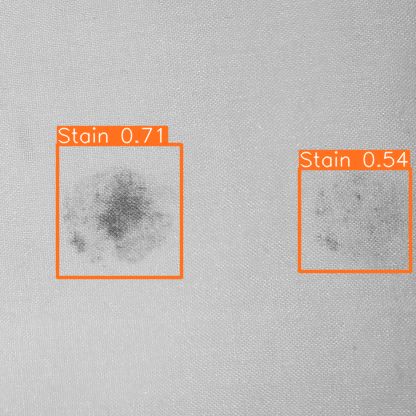

In [30]:
results = model(image_arrays[1])
res = results[0]
box = res.boxes[0]

Image.fromarray(res.plot()[:, :, ::-1])

## Load from previous model


0: 640x640 1 Hole, 1 Knot, 300.4ms
Speed: 17.2ms preprocess, 300.4ms inference, 26.0ms postprocess per image at shape (1, 3, 640, 640)


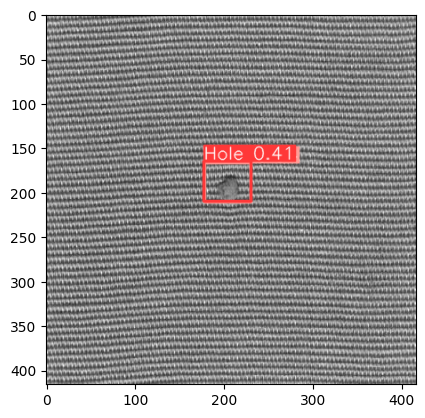

In [4]:
model = ultralytics.YOLO('runs/detect/train15/weights/best.pt')

image = Image.open('test/images/a00003_jpg.rf.41811eb9fdc1b70c2bd6881e46306b53.jpg')
image_array = np.array(image)

results = model(image_array)
res = results[0]
box = res.boxes[0]

plt.imshow(Image.fromarray(res.plot()[:, :, ::-1]))

In [7]:
res

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'Hole', 1: 'Knot', 2: 'Stain'}
orig_img: array([[[240, 240, 240],
        [164, 164, 164],
        [175, 175, 175],
        ...,
        [164, 164, 164],
        [166, 166, 166],
        [162, 162, 162]],

       [[228, 228, 228],
        [167, 167, 167],
        [173, 173, 173],
        ...,
        [160, 160, 160],
        [164, 164, 164],
        [172, 172, 172]],

       [[227, 227, 227],
        [174, 174, 174],
        [170, 170, 170],
        ...,
        [165, 165, 165],
        [155, 155, 155],
        [163, 163, 163]],

       ...,

       [[222, 222, 222],
        [132, 132, 132],
        [113, 113, 113],
        ...,
        [ 79,  79,  79],
        [ 95,  95,  95],
        [102, 102, 102]],

       [[227, 227, 227],
        [152, 152, 152],
        [133, 133, 133],
        ...,
        [115, 115, 115],
 

# Convert to TFLite

In [345]:
model.export(format="onnx",imgsz=[640, 640], opset=12)

Ultralytics YOLOv8.0.109  Python-3.10.8 torch-2.0.1+cpu CPU

PyTorch: starting from runs\detect\train15\weights\best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

ONNX: starting export with onnx 1.14.0 opset 12...
ONNX: export success  1.2s, saved as runs\detect\train15\weights\best.onnx (11.7 MB)

Export complete (1.7s)
Results saved to F:\Code\Defect_Detection\runs\detect\train15\weights
Predict:         yolo predict task=detect model=runs\detect\train15\weights\best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs\detect\train15\weights\best.onnx imgsz=640 data=data.yaml 
Visualize:       https://netron.app


============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'runs\\detect\\train15\\weights\\best.onnx'

In [37]:
import tensorflow as tf
import onnx
from onnx_tf.backend import prepare

onnx_model = onnx.load("runs\\detect\\train15\\weights\\best.onnx")  # load onnx model
tf_rep = prepare(onnx_model)  # prepare tf representation
tf_rep.export_graph("result/tf_saved_model.pb")  # export the model

INFO:tensorflow:Assets written to: result/tf_saved_model.pb\assets


INFO:tensorflow:Assets written to: result/tf_saved_model.pb\assets


In [39]:
converter = tf.lite.TFLiteConverter.from_saved_model('result/tf_saved_model.pb')
tflite_model = converter.convert()

with open('yolov8_model_V2.tflite', 'wb') as f:
  f.write(tflite_model)

## Test tflite model

In [1]:
import os
import numpy as np
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt

def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

names = ['Hole', 'Knot', "Stain"]
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

## Pre-process image

In [86]:
model_path = "yolov8_model_V2.tflite"
interpreter = tf.lite.Interpreter(model_path=model_path)

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.allocate_tensors()

# input img and convert into rgb
image = cv2.imread('test/images/a00003_jpg.rf.41811eb9fdc1b70c2bd6881e46306b53.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed
ori_image = image.copy()

# get the ratio between desired model input shape and the user input shape
image, ratio, dwdh = letterbox(image, auto=False)
image = np.expand_dims(image, axis = 0)
image = image.transpose((0, 3, 1, 2))
image = np.ascontiguousarray(image)

# casting to float and normalize each pixel
input_image = image.astype(np.float32)
input_image = input_image / 255

#Allocate tensors.
interpreter.allocate_tensors()
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# give input to the tflite model
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], input_image)

In [87]:
# get the prediction
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

## Post-Process and visualize

In [88]:
def check_probs(probs, threshold = 0.5):
    '''
        return label of highest probability and greater than threshold
        if not pass the threshold will return -1
    '''
    probs = np.array(probs)
    status = probs > threshold
    if True in status:
        idx_argmax = np.argmax(probs)
        return idx_argmax, round(probs[idx_argmax], 3)
    else:
        return -1, 0

def coco_to_yolo(coco_box, ori_image_size, input_shape=(640, 640)):
    ratio_X = input_shape[0] / ori_image_size[0]
    ratio_Y = input_shape[1] / ori_image_size[1]

    yolo_box = np.array(pbx.convert_bbox(coco_box, from_type="coco", to_type="yolo", image_size=input_shape))

    yolo_box[0] *= input_shape[0] / ratio_X
    yolo_box[2] *= input_shape[0] / ratio_X
    yolo_box[1] *= input_shape[1] / ratio_Y
    yolo_box[3] *= input_shape[1] / ratio_Y

    yolo_box = yolo_box.round().astype(np.int32).tolist()
    w, h = yolo_box[2], yolo_box[3]

    yolo_box[2] = yolo_box[0] - yolo_box[2]
    yolo_box[3] = yolo_box[1] - yolo_box[3]

    return yolo_box, (w, h)

Hole 0.41
Hole 0.317
Hole 0.328
Knot 0.324
Knot 0.336


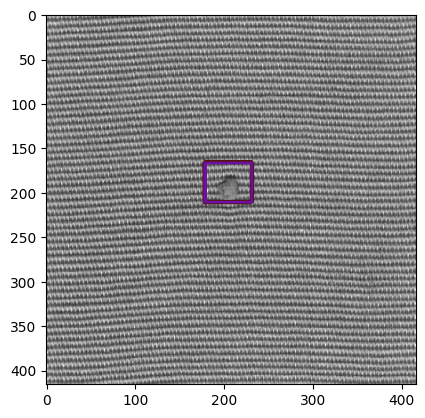

In [91]:
# Plot the original image + box from model
ori_image_size = ori_image[:, :].shape
plt.imshow(ori_image)
for box in output_data[0,:].T:
    kotak = box[:4]
    yolo_box, wh = coco_to_yolo(kotak, ori_image_size, input_shape = (640, 640))
    probs = box[4:]
    label, score = check_probs(probs, threshold=0.3)
    name = names[label]
    if label != -1:
        color = colors[name]
        text =name + " " + str(score)
        print(text)
        cv2.rectangle(ori_image, yolo_box[:2], yolo_box[2:], color, 2)
        # cv2.putText(ori_image, text, (yolo_box[0] - wh[0], yolo_box[1] - wh[1] - 5), 
        #   cv2.FONT_HERSHEY_COMPLEX, 0.75, [0, 0, 0], thickness = 1) 

In [222]:
import pybboxes as pbx

image_size = (640, 640)
coco_box = [222, 227, 39, 33]

yolo_bbox_list = coco_to_yolo(coco_box, image_size)

print(f"Coco: {coco_box}, YOLO: {yolo_bbox_list}")

Coco: [222, 227, 39, 33], YOLO: [242, 244, 203, 211]


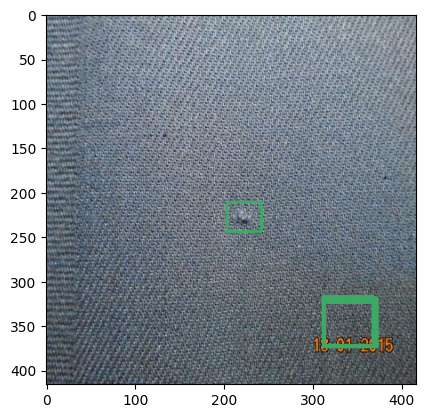

In [220]:
yolo_bbox_list = np.array(yolo_bbox_list)
yolo_bbox_list = yolo_bbox_list.round().astype(np.int32).tolist()
coco_box[2] = coco_box[0] - coco_box[2]; coco_box[3] = coco_box[1] - coco_box[3]
yolo_bbox_list[2] = yolo_bbox_list[0] - yolo_bbox_list[2]; yolo_bbox_list[3] = yolo_bbox_list[1] - yolo_bbox_list[3]
plt.imshow(ori_image)
cv2.rectangle(ori_image, yolo_bbox_list[0:2], yolo_bbox_list[2:4], color, 2)
# cv2.rectangle(ori_image, coco_box[0:2], coco_box[2:4], colors['Stain'], 2)
plt.show()